In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [16]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

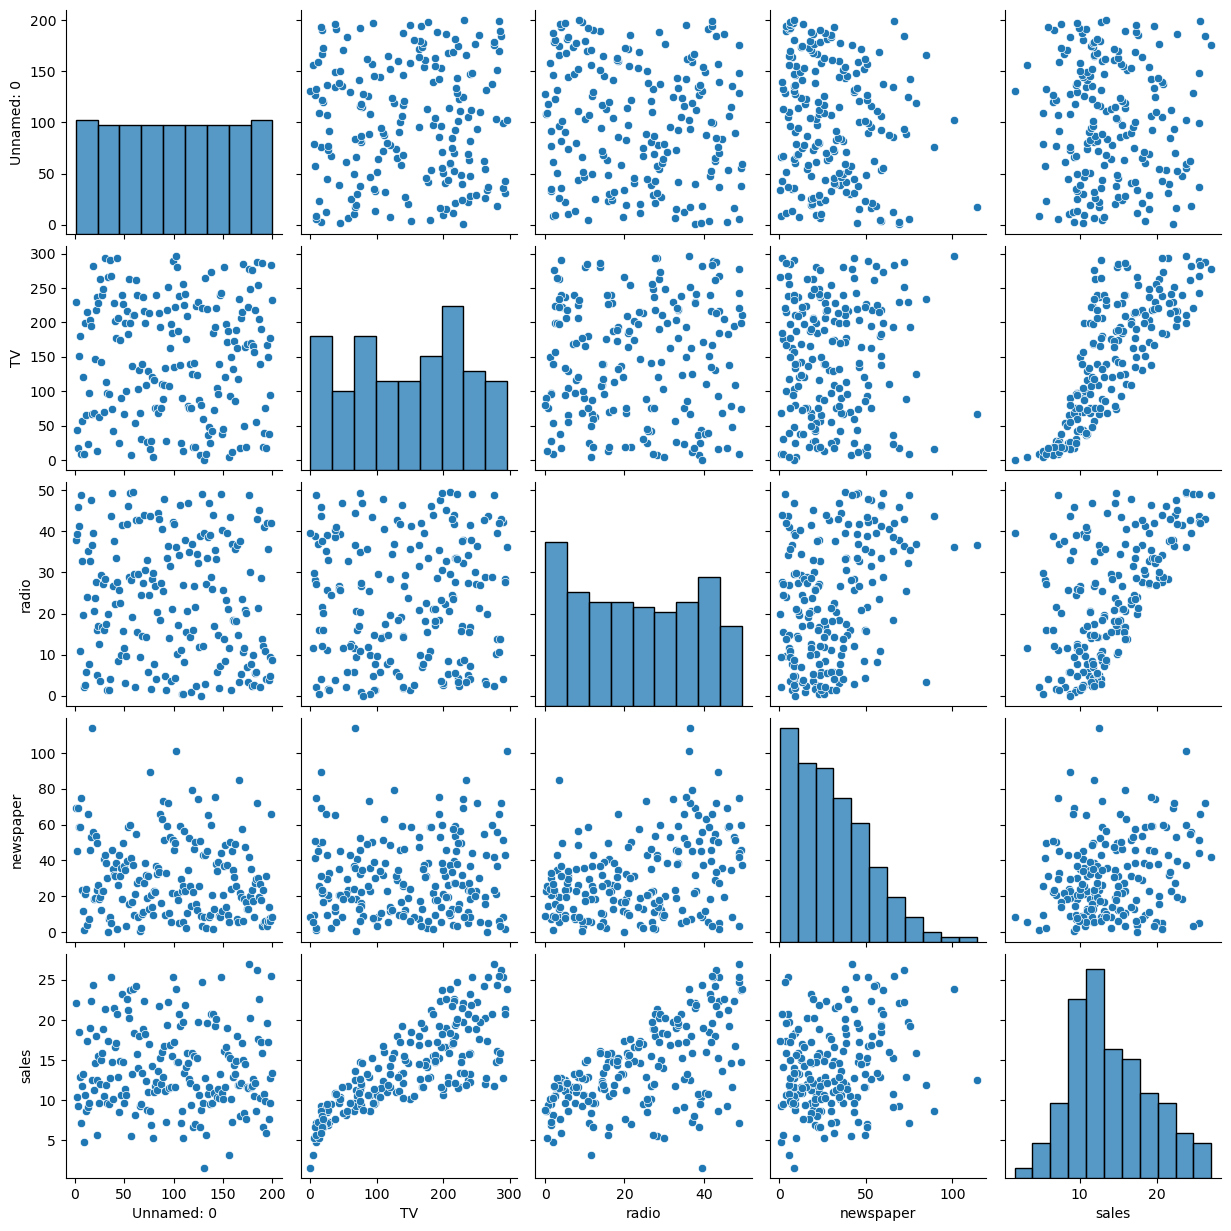

In [18]:
sns.pairplot(df)

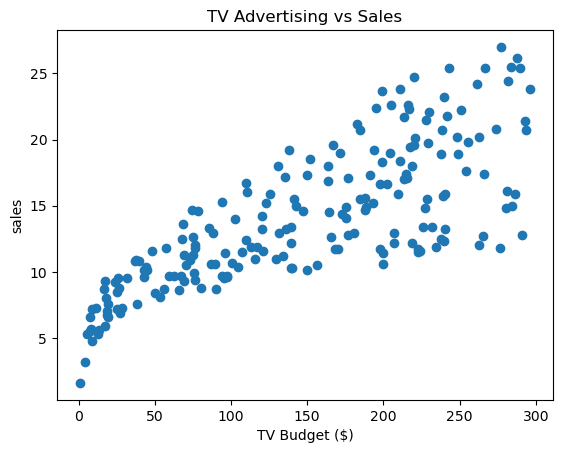

In [19]:
plt.scatter(df['TV'], df['sales'])
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Budget ($)')
plt.ylabel('sales')
plt.show()

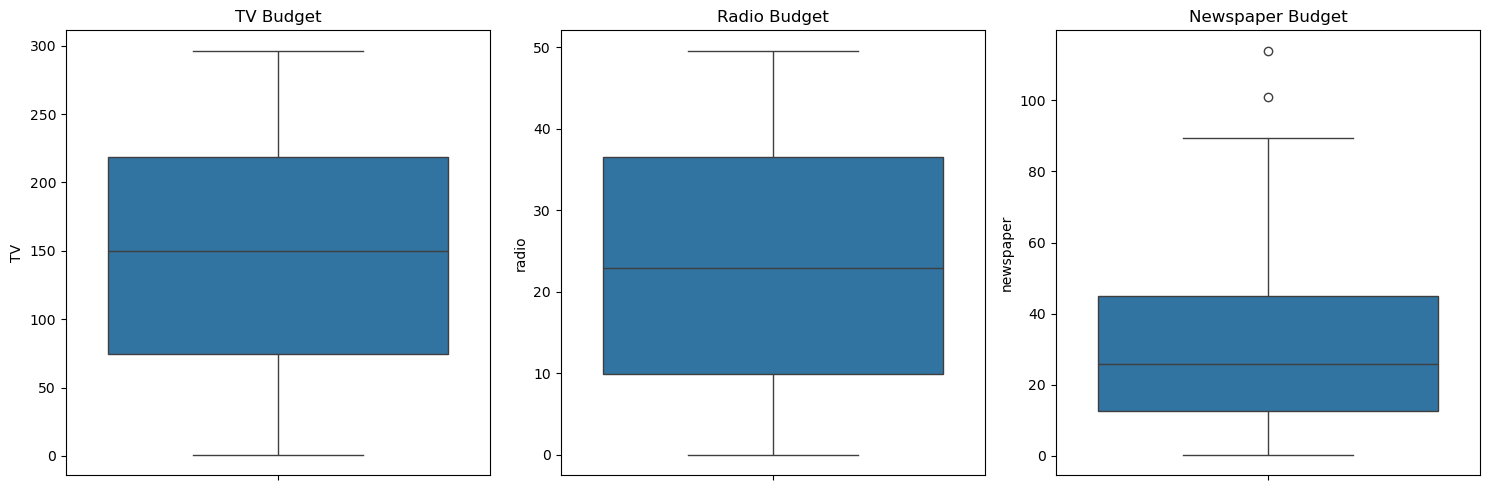

In [20]:
plt.figure(figsize=(15, 5))

# TV boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=df['TV'])
plt.title('TV Budget')

# Radio boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['radio'])
plt.title('Radio Budget')

# Newspaper boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['newspaper'])
plt.title('Newspaper Budget')

# Adjust spacing
plt.tight_layout()
plt.show()

<Axes: >

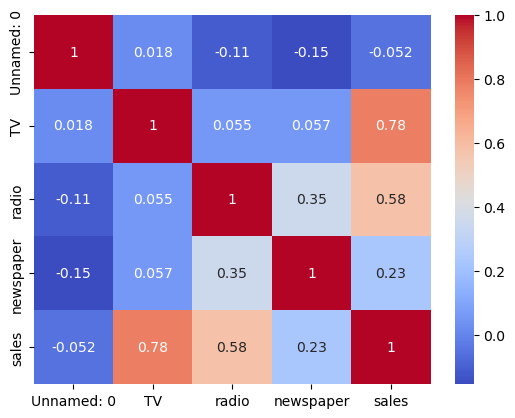

In [22]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='sales', ylabel='Count'>

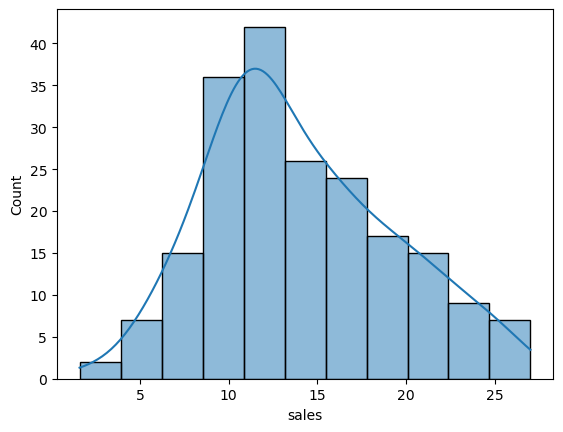

In [24]:
sns.histplot(df['sales'], kde=True)

## Feature Engineering

In [29]:
df = df.drop(['Unnamed: 0'],axis = 1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
## threshold--Domain expertise
corr_features=correlation(df,0.85)
## drop features when correlation is more than 0.85 

In [33]:
corr_features
# so there is not redundant feature

set()

In [33]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df = remove_outliers_iqr(df, 'newspaper') # From boxplot observation

In [35]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
x = df.drop("sales",axis = 1)
y = df["sales"]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 23)
X_train.shape,X_test.shape

((148, 3), (50, 3))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
x_train_scaled

array([[-0.66144927,  0.12059432,  2.20775004],
       [-0.06656493, -1.41203783, -0.15114298],
       [ 0.07286108,  1.15544851,  1.45673495],
       [ 0.23668665, -0.89461073, -0.60477625],
       [ 0.87223691,  1.65977618, -1.33058949],
       [-1.47941523,  0.91310924, -0.40316146],
       [-1.60257488,  0.29088678,  0.59483174],
       [-0.89266408,  1.36503923,  0.30249029],
       [ 0.87456068,  0.624922  ,  0.4184188 ],
       [ 1.36719927, -1.32034189, -0.50900923],
       [ 1.00933916, -0.98630667, -1.05336915],
       [-1.46198698, -0.50162813, -0.36787887],
       [-0.25711382,  0.71661794, -0.86687547],
       [-0.6451829 , -0.90116044,  0.30753066],
       [-1.06578471, -1.41858754, -0.4132422 ],
       [ 0.79206695,  0.06164693, -0.83159289],
       [-0.16416314,  1.25369416, -0.03521447],
       [-1.47012016, -0.75706682, -0.31243481],
       [-1.25865737,  0.97860634,  1.8146012 ],
       [ 1.13830822,  1.65977618,  0.74100246],
       [ 0.81530462, -0.00385017,  1.411

In [41]:
# As there is no multicollinearity and all fearures are important therefore using LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regressor = LinearRegression()
score = cross_val_score(regressor,x_train_scaled,y_train,cv = 5,scoring='r2')
print("Average R²:", score.mean())
print("Standard Deviation:", score.std())

Average R²: 0.8743633464654275
Standard Deviation: 0.06930452325899981


In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
regressor.fit(x_train_scaled,y_train)
y_pred = regressor.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("Mean absolute error", mae)
print("Mean squared error", mse)
print("R2 Score", score)

Mean absolute error 1.1355071602732407
Mean squared error 2.080979962976909
R2 Score 0.9237665796289405


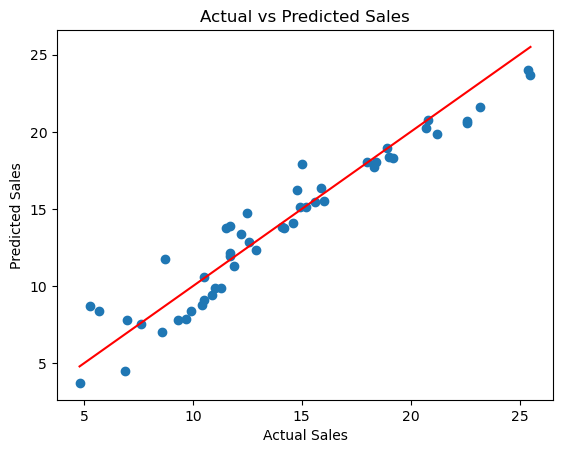

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')  # ideal line
plt.show()

In [1]:
import pickle
pickle.dump(scaler,open("scalar.pkl","wb"))
pickle.dump(regressor,open("ridge.pkl","wb"))

NameError: name 'scaler' is not defined